<a href="https://colab.research.google.com/github/Indian1999/szombatmi/blob/main/NetflixR%C3%A9szv%C3%A9nyek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [4]:
data = pd.read_csv('NFLX.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


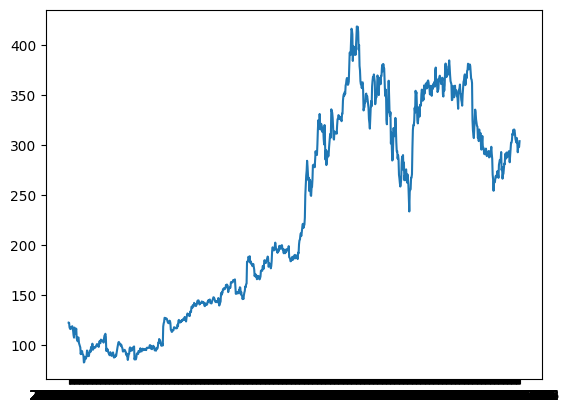

In [5]:
plt.plot(data['Date'], data["Close"])

In [6]:
print("Number of days:", len(data))

Number of days: 1007


In [7]:
train_data = data[:900] # 900
test_data = data[900:]  #107

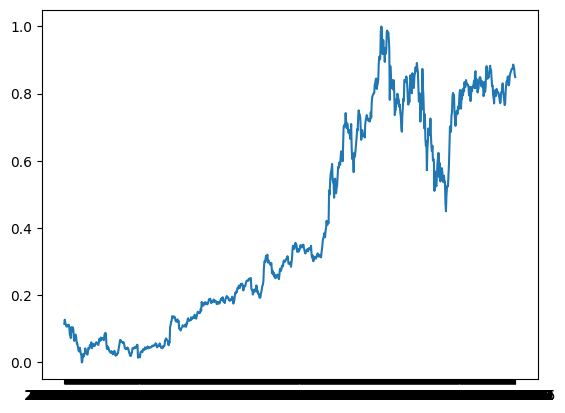

In [8]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train_data["Open"].values.reshape(-1, 1))
plt.plot(train_data["Date"], scaled_data)

In [9]:
prediction_days = 30
days_to_predict = 10

x_train = []
y_train = []

for i in range(prediction_days, len(scaled_data) - days_to_predict):
    x_train.append(scaled_data[i-prediction_days:i, 0])
    y_train.append(scaled_data[i:i+days_to_predict, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape) # (860, 30)
print(y_train.shape) # (860, 10)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
print(x_train.shape) # (860, 30, 1)

(860, 30)
(860, 10)
(860, 30, 1)


In [10]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(days_to_predict))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202,610 (791.45 KB)

 Trainable params: 202,610 (791.45 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])

In [18]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2275 - loss: 0.0015
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2447 - loss: 0.0017
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2086 - loss: 0.0017
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1990 - loss: 0.0017
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1922 - loss: 0.0016
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1951 - loss: 0.0018
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1973 - loss: 0.0015
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2215 - loss: 0.0019
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1681 - loss: 0.0016
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1895 - loss: 0.0016
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2138 - loss: 0.0016
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2019

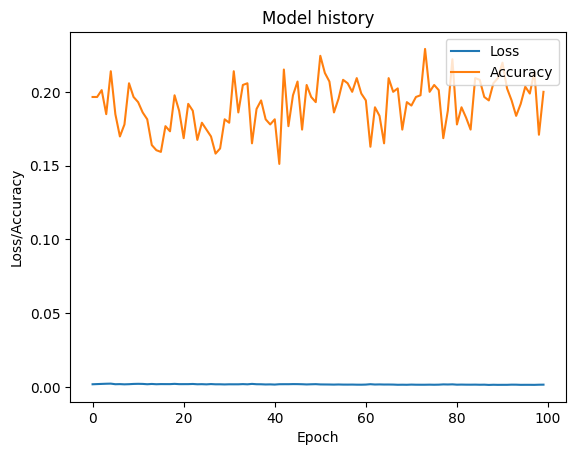

In [17]:
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])
plt.title("Model history")
plt.ylabel("Loss/Accuracy")
plt.xlabel("Epoch")
plt.legend(["Loss", "Accuracy"], loc="upper right")
plt.show()

In [20]:
actual_prices = test_data["Open"].values
total_dataset = pd.concat((train_data["Open"], test_data["Open"]), axis = 0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)
print(model_inputs)

[[0.77588685]
 [0.80340953]
 [0.80475923]
 [0.81224146]
 [0.8306094 ]
 [0.80522871]
 [0.79589802]
 [0.78243011]
 [0.76599865]
 [0.76910888]
 [0.80690121]
 [0.82494644]
 [0.83724069]
 [0.83457057]
 [0.8500337 ]
 [0.85144214]
 [0.82459435]
 [0.82928907]
 [0.85000442]
 [0.85951115]
 [0.86358971]
 [0.86887121]
 [0.87356593]
 [0.87327249]
 [0.87582522]
 [0.88671103]
 [0.88181098]
 [0.87471022]
 [0.85786801]
 [0.84950557]
 [0.8382383 ]
 [0.71356476]
 [0.71250841]
 [0.6790587 ]
 [0.67741556]
 [0.6746868 ]
 [0.69918718]
 [0.72832372]
 [0.74942052]
 [0.72952674]
 [0.7176726 ]
 [0.71500248]
 [0.69516736]
 [0.67600712]
 [0.67489212]
 [0.65135998]
 [0.67621254]
 [0.68416416]
 [0.6598691 ]
 [0.67251544]
 [0.66735133]
 [0.64238138]
 [0.64050345]
 [0.66218713]
 [0.65725772]
 [0.64857246]
 [0.6398873 ]
 [0.62917754]
 [0.62988171]
 [0.62782784]
 [0.61295149]
 [0.62917754]
 [0.64026876]
 [0.61691266]
 [0.61817434]
 [0.60077464]
 [0.62433615]
 [0.62862004]
 [0.61791028]
 [0.60188964]
 [0.60893167]
 [0.61

In [21]:
x_test = []
for i in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[i-prediction_days:i, 0])

x_test = np.array(x_test)
x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(x_test)

[[0.77588685 0.80340953 0.80475923 ... 0.87471022 0.85786801 0.84950557]
 [0.80340953 0.80475923 0.81224146 ... 0.85786801 0.84950557 0.8382383 ]
 [0.80475923 0.81224146 0.8306094  ... 0.84950557 0.8382383  0.71356476]
 ...
 [0.5978991  0.61744079 0.6106922  ... 0.66541476 0.63246381 0.62768107]
 [0.61744079 0.6106922  0.60863824 ... 0.63246381 0.62768107 0.63114348]
 [0.6106922  0.60863824 0.61447724 ... 0.62768107 0.63114348 0.63944719]]


In [26]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
predicted_prices = predicted_prices[:, -1]
print(predicted_prices)
print(len(predicted_prices))
print(actual_prices)
print(len(actual_prices))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[363.5067  360.16602 351.1441  339.60413 325.2246  309.2786  292.43433
 277.14563 266.08173 260.6445  256.7108  257.40436 264.48422 272.72916
 280.2251  287.75464 292.75955 300.69965 308.25052 311.81226 315.64108
 315.8466  310.66724 306.21924 306.28415 305.3897  303.21613 300.6754
 298.79626 299.88324 301.75385 300.19202 299.45654 299.21066 293.41974
 289.02783 283.46835 284.4616  286.1486  285.30884 281.99188 281.2728
 282.28882 284.5697  285.72144 286.41043 286.308   282.49652 276.6322
 273.27914 269.8899  272.33386 275.76654 279.46094 285.27158 287.97012
 291.0637  292.2051  293.8147  293.56726 291.0458  290.1082  299.85764
 301.9327  299.4259  297.025   308.0174  310.51608 307.49463 306.59314
 307.56824 312.22717 316.7453  321.5572  323.4426  323.01926 323.85944
 324.20892 324.49075 325.1753  325.15512 325.764   325.98984 326.87317
 329.97485 331.5765  330.60858 331.79337 333.38297 334.92584 332.68283
 331.35718 331.4795  330.8098  329.85654 3

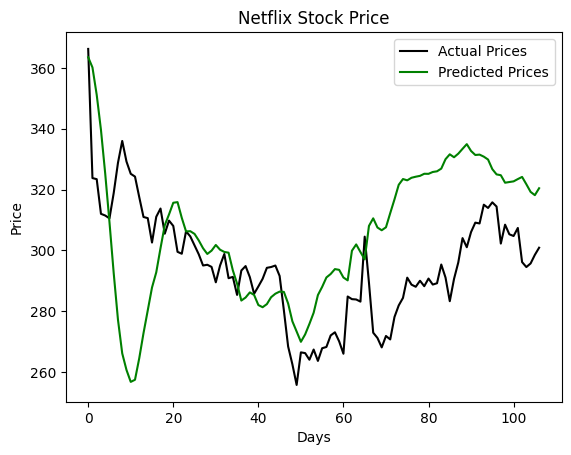

In [27]:
plt.plot(actual_prices, color = "black", label = "Actual Prices")
plt.plot(predicted_prices, color = "green", label = "Predicted Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Netflix Stock Price")
plt.legend()
plt.show()